In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('clickbait_data.csv')
df.head()

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


In [ ]:
head={'clickbait': 'kategori'}
df.rename(columns=head, inplace=True)
df.tail()

,headline,kategori
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0
31999,Computer Makers Prepare to Stake Bigger Claim ...,0


In [ ]:
judul = df['headline'].values
label = df['kategori'].values
judul_latih, judul_test, label_latih, label_test = train_test_split(judul, label, test_size=0.2)

In [ ]:
tk = Tokenizer(num_words=5000, oov_token='<OOV>')
tk.fit_on_texts(judul_latih)


sekuens_latih = tk.texts_to_sequences(judul_latih)
sekuens_test = tk.texts_to_sequences(judul_test)

pad_latih = pad_sequences(sekuens_latih,maxlen=20,padding='post',truncating='post')
pad_test = pad_sequences(sekuens_test,maxlen=20,padding='post',truncating='post')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 16, input_length=20),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
class Mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.8):
      print('\nAkurasi telah mencapai > 80%')
      self.model.stop_training = True
callbacks = Mycallback()

In [ ]:
hist = model.fit(pad_latih, label_latih, 
                    epochs=30, validation_data=(pad_test, label_test), 
                    verbose=2, callbacks=[callbacks])

Epoch 1/30

Akurasi telah mencapai > 80%
800/800 - 12s - loss: 0.1322 - accuracy: 0.9421 - val_loss: 0.0712 - val_accuracy: 0.9753 - 12s/epoch - 15ms/step


In [ ]:
model.evaluate(pad_test, label_test)

200/200 [==============================] - 1s 6ms/step - loss: 0.0712 - accuracy: 0.9753


[0.07116158306598663, 0.9753124713897705]

<function matplotlib.pyplot.show(*args, **kw)>

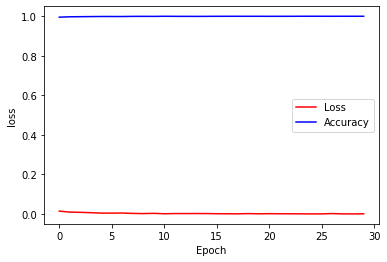

In [ ]:
plt.plot(hist.history['loss'], color='red')
plt.plot(hist.history['accuracy'], color='blue')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(["Loss", 'Accuracy'])
plt.show

In [ ]:
# Nama : Mario Valerian Rante Ta'dung (riooorante)
# E-mail : rantetadungrio@gmail.com
